In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
from os.path import splitext,basename,exists
from scipy import stats

In [2]:
luts=pd.read_excel('comb.xls','Sheet1')

In [3]:
luts.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


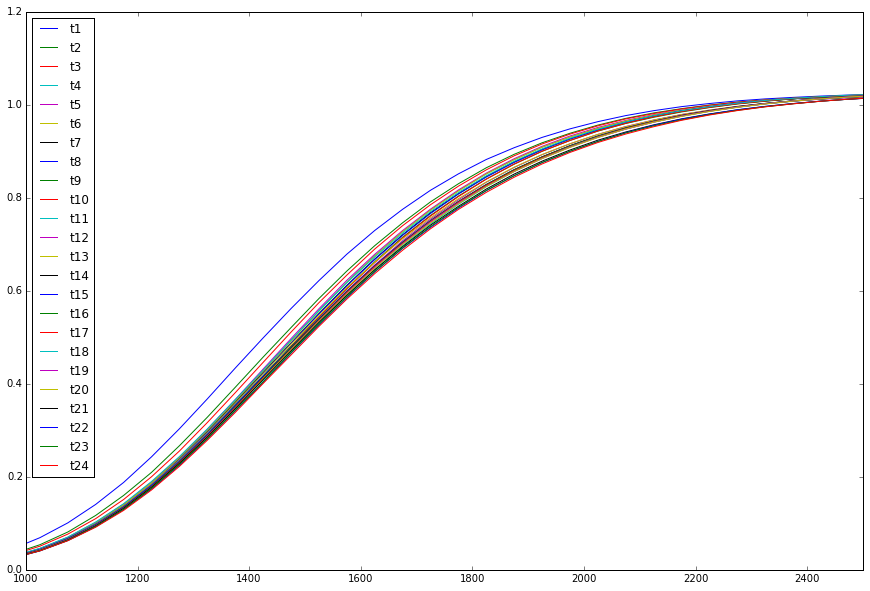

In [8]:
# plot(luts.t1.cumsum())
# plot(luts.t24.cumsum())
luts.cumsum().plot(xlim=(1000,2500),figsize=(15,10))

In [122]:
    nums_fh=csv_fh+".nums"    
    if exists(csv_fh):# and (not exists(nums_fh)) :
        print ">>> STATUS  : processing : %s" % csv_fh 
        arr=np.genfromtxt(csv_fh,delimiter=',')
        vec=np.concatenate(arr)
        nums=pd.DataFrame()
        
        nums.loc[0,'mode']=stats.mode(vec)[0][0]
        nums.loc[0,'mean']=np.mean(vec)
        nums.loc[0,'median']=np.median(vec)
        nums.loc[0,'Q25']=np.percentile(vec, 25)
        nums.loc[0,'Q50']=np.percentile(vec, 50)
        nums.loc[0,'Q75']=np.percentile(vec, 75)
        nums.loc[0,'Q90']=np.percentile(vec, 90)
        
        bins = np.arange(0, 5000, 50)#np.arange(5000)
        probs, binedges = np.histogram(vec, bins=bins, normed=True)
        bincenters = 0.5*(binedges[1:]+binedges[:-1])
        nums.loc[0,'cdf25']=pdf2cdfestimate(bincenters,probs,0.25)        
        nums.loc[0,'cdf50']=pdf2cdfestimate(bincenters,probs,0.5)        
        nums.loc[0,'cdf75']=pdf2cdfestimate(bincenters,probs,0.75)        
        nums.loc[0,'cdf90']=pdf2cdfestimate(bincenters,probs,0.9)        

>>> STATUS  : processing : /media/Transcend/20160219_000356_267/WellA01_WellA01_Seq0344.nd200.csv


In [72]:
cdf=luts.t1.cumsum()
def cdf2estimate(cdf,percentile):
    for cdfi in cdf.iteritems():
        if (percentile-cdfi[1])<0:
            break
    cdf.ix[cdfi[0]-50]
    cdfi[0]-50
    Y=np.array([cdfi[0]-50,         cdfi[0]])
    X=np.array([cdf.ix[cdfi[0]-50], cdfi[1]])
    return np.interp(percentile, X, Y)

In [73]:
# cdfi
# cdfi_1=
# cdf.loc[cdfi[0]-50,'t1']
cdf2estimate(cdf,0.9)

1859.6966413866594

In [99]:
def pdf2cdfestimate(bincenters,pdf,percentile):
    pdf=pdf/pdf.sum()
    cdf=np.cumsum(pdf)
    for i in range(len(cdf)):
        if (percentile-cdf[i])<0:
            break
#     cdf.ix[cdfi[0]-50]
#     cdfi[0]-50
    Y=np.array([bincenters[i-1],bincenters[i]])
    X=np.array([cdf[i-1], cdf[i]])
    return np.interp(percentile, X, Y)

In [97]:
pdf=probs
pdf=pdf/pdf.sum()

In [104]:
cdf=np.cumsum(pdf)

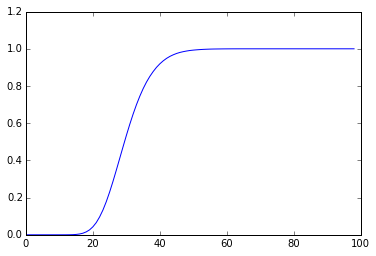

In [103]:
plot(np.cumsum(pdf))

In [100]:
pdf2cdfestimate(bincenters,probs,0.9)

1973.9829088471847

In [74]:
csv_fh='/media/Transcend/20160219_000356_267/WellA01_WellA01_Seq0344.nd200.csv'

In [115]:
cdf[38:42]

array([ 0.87769699,  0.9004631 ,  0.91937637,  0.93524551])

In [114]:
bincenters[38:42]

array([ 1925.,  1975.,  2025.,  2075.])

In [123]:
nums

,mode,mean,median,Q25,Q50,Q75,Q90,cdf25,cdf50,cdf75,cdf90
0,1459,1554.39925,1521,1317,1521,1756,1998,1292.219208,1496.896135,1731.400412,1973.982909
